In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 8, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1080 images belonging to 8 classes.
Found 360 images belonging to 8 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 1080,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 360)

Epoch 1/100
33/33 [==============================] - 542s 16s/step - loss: 2.0679 - acc: 0.1414 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0458 - val_acc: 0.1806 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 534s 16s/step - loss: 2.0656 - acc: 0.1462 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.0280 - val_acc: 0.2028 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 539s 16s/step - loss: 2.0315 - acc: 0.1891 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9973 - val_acc: 0.1944 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 544s 16s/step - loss: 2.0124 - acc: 0.1960 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9666 - val_acc: 0.2083 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
33/33 [==============================] - 537s 16s/step - loss: 1

Epoch 38/100
33/33 [==============================] - 236s 7s/step - loss: 1.6767 - acc: 0.3580 - precision: 0.6469 - recall: 0.0638 - val_loss: 1.6876 - val_acc: 0.3833 - val_precision: 0.6808 - val_recall: 0.0667
Epoch 39/100
33/33 [==============================] - 234s 7s/step - loss: 1.6594 - acc: 0.3618 - precision: 0.6083 - recall: 0.0666 - val_loss: 1.6090 - val_acc: 0.4139 - val_precision: 0.6597 - val_recall: 0.0639
Epoch 40/100
33/33 [==============================] - 231s 7s/step - loss: 1.6172 - acc: 0.3797 - precision: 0.5943 - recall: 0.0729 - val_loss: 1.6606 - val_acc: 0.3889 - val_precision: 0.5556 - val_recall: 0.0667
Epoch 41/100
33/33 [==============================] - 232s 7s/step - loss: 1.6256 - acc: 0.3763 - precision: 0.6590 - recall: 0.0704 - val_loss: 1.5658 - val_acc: 0.4222 - val_precision: 0.6682 - val_recall: 0.0722
Epoch 42/100
33/33 [==============================] - 232s 7s/step - loss: 1.6154 - acc: 0.3712 - precision: 0.5721 - recall: 0.0742 - val_l

33/33 [==============================] - 327s 10s/step - loss: 1.3960 - acc: 0.4622 - precision: 0.6660 - recall: 0.2308 - val_loss: 1.3889 - val_acc: 0.5111 - val_precision: 0.6872 - val_recall: 0.2694
Epoch 77/100
33/33 [==============================] - 328s 10s/step - loss: 1.4111 - acc: 0.4659 - precision: 0.6571 - recall: 0.2304 - val_loss: 1.3966 - val_acc: 0.4694 - val_precision: 0.7089 - val_recall: 0.2611
Epoch 78/100
33/33 [==============================] - 327s 10s/step - loss: 1.3799 - acc: 0.4912 - precision: 0.6689 - recall: 0.2418 - val_loss: 1.4694 - val_acc: 0.4278 - val_precision: 0.6318 - val_recall: 0.2667
Epoch 79/100
33/33 [==============================] - 329s 10s/step - loss: 1.3812 - acc: 0.5009 - precision: 0.6617 - recall: 0.2570 - val_loss: 1.4981 - val_acc: 0.4500 - val_precision: 0.6302 - val_recall: 0.2694
Epoch 80/100
33/33 [==============================] - 328s 10s/step - loss: 1.3303 - acc: 0.4934 - precision: 0.7079 - recall: 0.2677 - val_loss: 1.3

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.13      0.29      0.18        48
       calm       0.16      0.10      0.13        48
    disgust       0.05      0.08      0.07        48
    fearful       0.14      0.10      0.12        48
      happy       0.21      0.12      0.16        48
    neutral       0.04      0.04      0.04        24
        sad       0.21      0.06      0.10        48
  surprised       0.19      0.17      0.18        48

avg / total       0.15      0.13      0.13       360



Confusion matrix, without normalization
[[14  7  9  5  4  5  1  3]
 [15  5 11  7  1  4  1  4]
 [17  3  4  7  6  3  2  6]
 [13  4 11  5  4  2  3  6]
 [13  4  9  3  6  7  2  4]
 [ 3  0  9  3  1  1  1  6]
 [19  6  9  4  1  1  3  5]
 [15  2 13  2  6  1  1  8]]


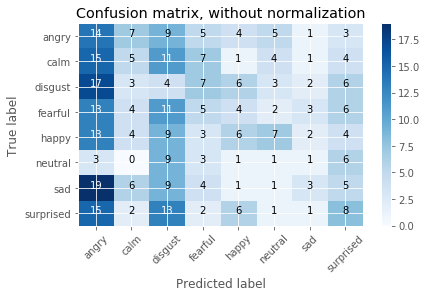

Normalized confusion matrix
[[29.1667 14.5833 18.75   10.4167  8.3333 10.4167  2.0833  6.25  ]
 [31.25   10.4167 22.9167 14.5833  2.0833  8.3333  2.0833  8.3333]
 [35.4167  6.25    8.3333 14.5833 12.5     6.25    4.1667 12.5   ]
 [27.0833  8.3333 22.9167 10.4167  8.3333  4.1667  6.25   12.5   ]
 [27.0833  8.3333 18.75    6.25   12.5    14.5833  4.1667  8.3333]
 [12.5     0.     37.5    12.5     4.1667  4.1667  4.1667 25.    ]
 [39.5833 12.5    18.75    8.3333  2.0833  2.0833  6.25   10.4167]
 [31.25    4.1667 27.0833  4.1667 12.5     2.0833  2.0833 16.6667]]


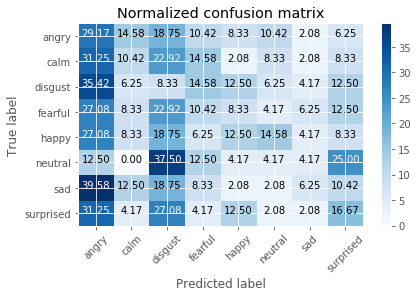

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

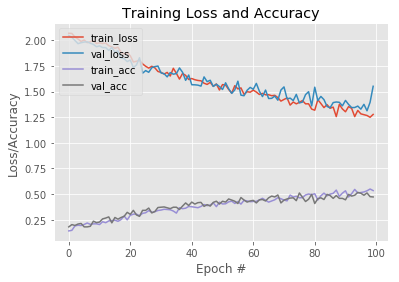

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")